# Informatics 1 Cognitive Science (2018–2019)
## Assignment 2: Clustering and Categorization

------------------------

## Answering questions
The assignment notebooks include a combination of instructions, code that has been written for you to use, run, or examine, and questions you need to answer.

### Code
In every place where you need to write code you will see:

    YOUR CODE HERE

    raise NotImplementedError()

or

    YOUR CODE HERE

Delete the raise NotImplementedError() (if applicable) and write your solution code inside the marked cell.

### Text
For questions that require you to write text the cell will say YOUR ANSWER HERE. Again delete that line if you want to answer the question and write your response in the marked cell.

Most of the cells that already contained text or calculations will be read-only. You can open new cells for additional calculation or notes, however these cells will not be part of your submission and will not be considered for marking! Thus, make sure that all your solutions are contained in the marked cells.

------------------------


# Introduction

In this task you will induce semantic categories for a set of words by clustering them into sets of semantically related words. You will cluster the words on the basis of their
representations in a space of semantic features, applying **agglomerative hierarchical clustering**. We
will use the [**linkage**](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) function from scikit-learn to do the clustering:

$$\mathbf{Z} = \mathbf{linkage}(\mathbf{X},\mathbf{method},\mathbf{metric})$$

The function performs agglomerative hierarchical clustering of the rows of matrix **X**
and returns tree **Z** encoding a dendrogram of the resulting hierarchical clusters. 
The argument **method** describes the clustering criterion, i.e., how to measure the distance
between clusters. 

In the lectures, we discussed three different clustering criteria:

- **single-linkage**, (called 'single' in scikit-learn)
- **complete-linkage**, ('complete')
- **group average**, ('average')
The argument **metric** specifies the function that will be used to compute distances between the rows of **X**. We will use cosine distance (via the argument 'cosine')[(*1)](#References).

## A simple example
Let's first go through an example to show what you'll need to know for task 1. 

In [1]:
# import numpy, the python scientific package
import numpy as np

# import maplotlib to plot the visualizations
from matplotlib import pyplot as plt
#this is to output the plots in the notebook
%matplotlib inline

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# A seed for the random number generator so all results are reproducible
np.random.seed(15)

In [2]:
'''
Assume we are given matrix contains features for four letters. 
Each letter's features are a row in the matrix A. 

In this case, the features are made up and don't have any particular
interpretation.
'''

A = np.matrix([[1,2,3],[1,2,5],[7,1,-5],[3,4,6]])
print(A)

[[ 1  2  3]
 [ 1  2  5]
 [ 7  1 -5]
 [ 3  4  6]]


In [3]:
# The letters are defined in:
letters = ['a','o','k','e']
print(letters)

['a', 'o', 'k', 'e']


We'll now do hierarchical clustering on the data using the single-linkage criterion.


In [4]:
# First, import the linkage function from scipy library
from scipy.cluster.hierarchy import linkage

'''
Now, we use the linkage function on the feature matrix A,
with our chosen criterion and distance function: 
'''

TreeA = linkage(A,'single','cosine')

Now we have two options to further inspect the clustering. 

### Visualising dendograms

The first option is to view the corresponding dendrogram. Try it out and make sure you understand how to read it.

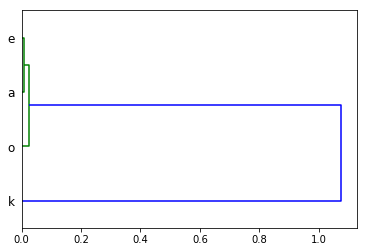

In [5]:
# import the dendrogram function from scipy
from scipy.cluster.hierarchy import dendrogram

dendrogram(TreeA, labels=letters, orientation= 'right');

### Working with clusters
The second option is to obtain the clusters at a certain height in the tree. This is done with the function **fcluster**, where we have to specify the maximum number **t** of the resulting clusters.

The function returns a column vector **clustering** of size 4, where row i contains the cluster assignment of row (item) i of matrix A. 

Try it out with an increasing number of maximum clusters, starting with t=1. 

In [6]:
# import the flat cluster function from scipy
from scipy.cluster.hierarchy import fcluster

In [7]:
clustering = fcluster(TreeA,t=1, criterion= 'maxclust')

In [8]:
for letter, cluster in zip(letters, clustering):
    print (letter,':', cluster)

a : 1
o : 1
k : 1
e : 1


Compare it with the dendrogram of your clustering and discuss briefly how both representations relate to one another.


The dendrogram illustrates how the clustering works for each step and show the distances between letters vividly.However the cluster will only tell us the outcome.
Depending on the number of the resulting clusters,the clustering shows certain stage of clustering and where different letters belong to respectively.

## Loading the data

For our task, you will use the data relating to Task 1. Let's load the files we'll need to the notebook.

In [9]:
# First, we import the pandas library [pandas.pydata.org], a useful package for data analysis.
import pandas as pd 

# edit the pandas display options
pd.set_option('display.max_columns', 12)

In [10]:
# then we import the different files relating to Task 1
words1 = pd.read_csv("./words1.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()

matrix1_mcrae = pd.read_csv("./matrix1_mcrae.csv", index_col=0).values
matrix1_bnc = pd.read_csv("./matrix1_bnc.csv", index_col=0).values

### About the data
You've just loaded the words we want to cluster, in **words1**. These are the the 44 most frequently-occurring content words in the British National Corpus [(BNC)[1]](#References). You can see what each word is (e.g., banana, boat) by printing the **words1** matrix. 

You have also loaded two matrices of features: **matrix1_mcrae** and **matrix1_bnc**

Each of the two matrices represents a different set of features for the words in **words1**.

**matrix1 bnc** is a 44×2497 matrix where each row contains features for the corresponding word in **words1**. The features are the number of times a target word co-occurs with a context word in the BNC, using a context window of ± 5 words. 

**matrix1_mcrae** is a 44 × 2526 matrix where each row contains features for the corresponding word in **words1**. The  features are based on judgments by humans in a "norming" study conducted by [McRae et al. [2]](#References). 

The list of features can be seen in **feats_mcrae**. To do this, you can print **feats_mcrae** in the cell below. Notice that there are many features, so they won't print all at once. Remember that you can print specific entries in a matrix using notation like `feats_mcrae[200:240]` -- that will product the 200th through the 240th features in the McRae corpus.

Each matrix cell in **matrix1_mcrae** corresponds to the number of humans that listed a feature for a given target word. (You have already worked with McRae et al.’s data in assignment 1).

Start by inspecting the data (e.g. using the print() command) and make sure you understand what each file contains.

In [11]:
print(words1)
print(feats_mcrae[200:240])
print(matrix1_bnc )
print(matrix1_mcrae)

['banana' 'boat' 'bottle' 'bowl' 'car' 'cat' 'cherry' 'chicken' 'chisel'
 'corn' 'cow' 'cup' 'dog' 'duck' 'eagle' 'elephant' 'hammer' 'helicopter'
 'kettle' 'knife' 'lettuce' 'lion' 'motorcycle' 'mushroom' 'onion' 'owl'
 'peacock' 'pear' 'pen' 'pencil' 'penguin' 'pig' 'pineapple' 'potato'
 'rocket' 'scissors' 'screwdriver' 'ship' 'snail' 'spoon' 'swan'
 'telephone' 'truck' 'turtle']
['associated_with_the_house_of_god' 'associated_with_training'
 'associated_with_vampires' 'associated_with_winning'
 'associated_with_winter' 'associated_with_witches' 'becomes_a_butterfly'
 'beh_-_bahs' 'beh_-_bark_peals_off' 'beh_-_barks' 'beh_-_bites'
 'beh_-_branches_droop_down' 'beh_-_breathes' 'beh_-_builds_dams'
 'beh_-_builds_nests' 'beh_-_burrows' 'beh_-_buzzes' 'beh_-_cannot_fly'
 'beh_-_caws' 'beh_-_chases' 'beh_-_chases_cats' 'beh_-_chews_on_wood'
 'beh_-_chirps' 'beh_-_climbs' 'beh_-_climbs_trees' 'beh_-_clucks'
 'beh_-_cocoons' 'beh_-_communicates' 'beh_-_coos' 'beh_-_crawls'
 'beh_-_croaks' 

# Task 1: Semantic Categories

## Question 1 (15%): 
a) Cluster the target words on the basis of the vector representations obtained from the BNC. 

Do this by using all three clustering criteria (single-linkage: ```'single'```, complete-linkage: ```'complete'```, and average-linkage: ```'average'```). 
Show the dendrogram output for each criterion and use the ```words1``` vector to display the labels [**10 points**].

Make sure all the plots are readable (you can change the figure size for this), have a title, and that the font of the labels is readable too (you can use ```leaf_font_size=``` in the dendogram function) [**5 points**]. You can use multiple cells to plot each tree.

{'color_list': ['g',
  'b',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b',
  'b',
  'b',
  'b',
  'c',
  'c',
  'm',
  'b',
  'b',
  'y',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 0.17147701078296473, 0.17147701078296473, 0.0],
  [0.0, 0.5343465592809526, 0.5343465592809526, 0.0],
  [0.0, 0.3524828740999538, 0.3524828740999538, 0.0],
  [0.0, 0.40659256571278757, 0.40659256571278757, 0.0],
  [0.3524828740999538,
   0.40999852804719983,
   0.40999852804719983,
   0.40659256571278757],
  [0.0, 0.42597547705561023, 0.42597547705561023, 0.0],
  [0.40999852804719983,
   0.4749569424340049,
   0.4749569424340049,
   0.42597547705561023],
  [0.0, 0.4975556732215327, 0.4975556732215327, 0.0],
  [0.0, 0.5021593810008134, 0.5021593810008134, 0.4975556732215327],
  [0.0, 0.5059423366720521, 0.5059423366720521, 0.5021593810008134],
  [0.4749569424

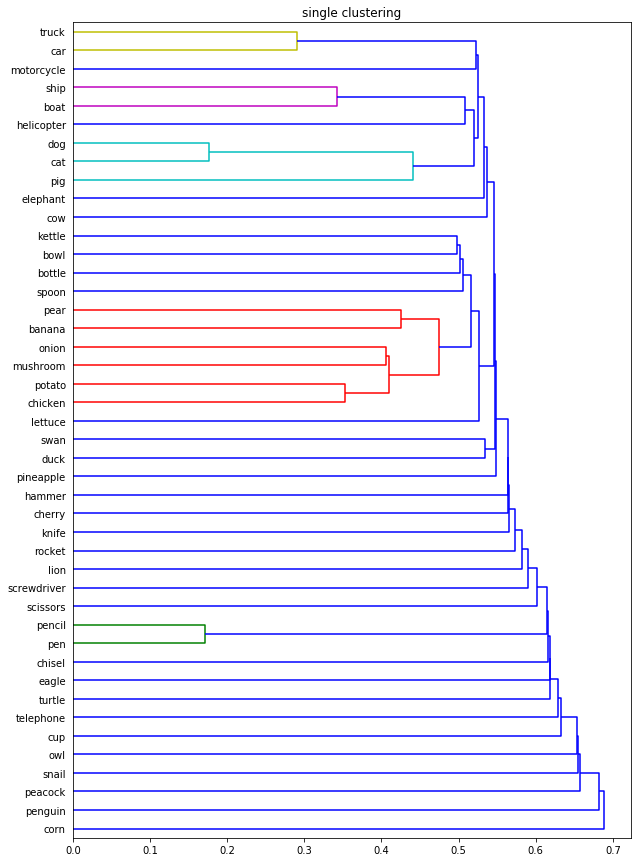

In [12]:
TreeA = linkage(matrix1_bnc,'single','cosine')
plt.figure(figsize=[10,15])
plt.title('single clustering')
dendrogram(TreeA, labels=words1, orientation= 'right',leaf_font_size=10)


{'color_list': ['g',
  'b',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b',
  'b',
  'b',
  'b',
  'c',
  'c',
  'm',
  'b',
  'b',
  'y',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 0.17147701078296473, 0.17147701078296473, 0.0],
  [0.0, 0.5343465592809526, 0.5343465592809526, 0.0],
  [0.0, 0.3524828740999538, 0.3524828740999538, 0.0],
  [0.0, 0.40659256571278757, 0.40659256571278757, 0.0],
  [0.3524828740999538,
   0.40999852804719983,
   0.40999852804719983,
   0.40659256571278757],
  [0.0, 0.42597547705561023, 0.42597547705561023, 0.0],
  [0.40999852804719983,
   0.4749569424340049,
   0.4749569424340049,
   0.42597547705561023],
  [0.0, 0.4975556732215327, 0.4975556732215327, 0.0],
  [0.0, 0.5021593810008134, 0.5021593810008134, 0.4975556732215327],
  [0.0, 0.5059423366720521, 0.5059423366720521, 0.5021593810008134],
  [0.4749569424

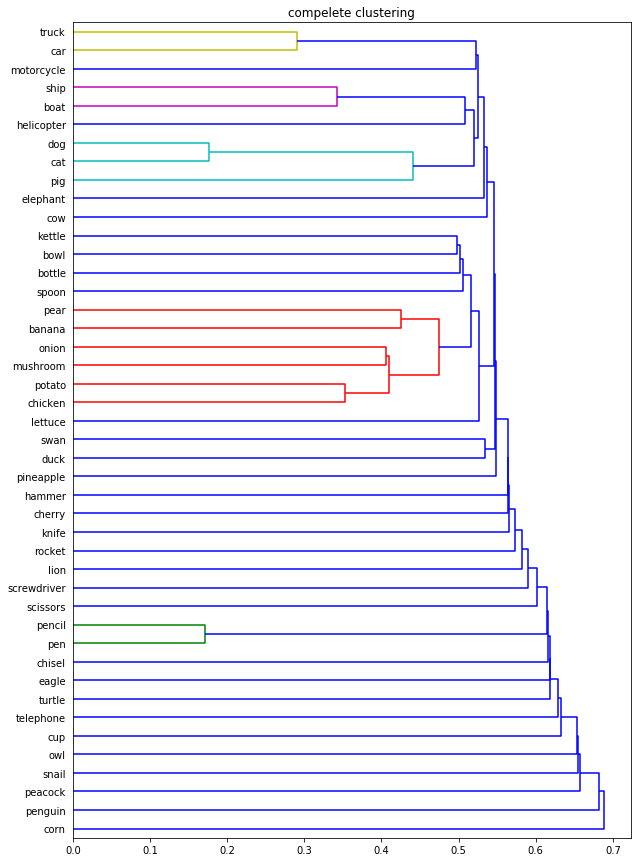

In [13]:
TreeB = linkage(matrix1_bnc,'complete','cosine')
plt.figure(figsize=[10,15])
plt.title('compelete clustering')
dendrogram(TreeA, labels=words1, orientation= 'right',leaf_font_size=10)

{'color_list': ['g',
  'g',
  'r',
  'r',
  'b',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b',
  'b',
  'b',
  'b',
  'm',
  'y',
  'b',
  'b',
  'b',
  'k',
  'k',
  'k',
  'k',
  'b',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 0.42597547705561023, 0.42597547705561023, 0.0],
  [0.0, 0.603094097506967, 0.603094097506967, 0.42597547705561023],
  [0.0, 0.4975556732215327, 0.4975556732215327, 0.0],
  [0.0, 0.5962048666986436, 0.5962048666986436, 0.4975556732215327],
  [0.0, 0.6408489527385198, 0.6408489527385198, 0.5962048666986436],
  [0.0, 0.3524828740999538, 0.3524828740999538, 0.0],
  [0.0, 0.40659256571278757, 0.40659256571278757, 0.0],
  [0.3524828740999538,
   0.4793102094083156,
   0.4793102094083156,
   0.40659256571278757],
  [0.0, 0.5811847662531386, 0.5811847662531386, 0.4793102094083156],
  [0.0, 0.6733102807597856, 0.6733102807597856, 0.5811847662531386],
  [0.64084895273

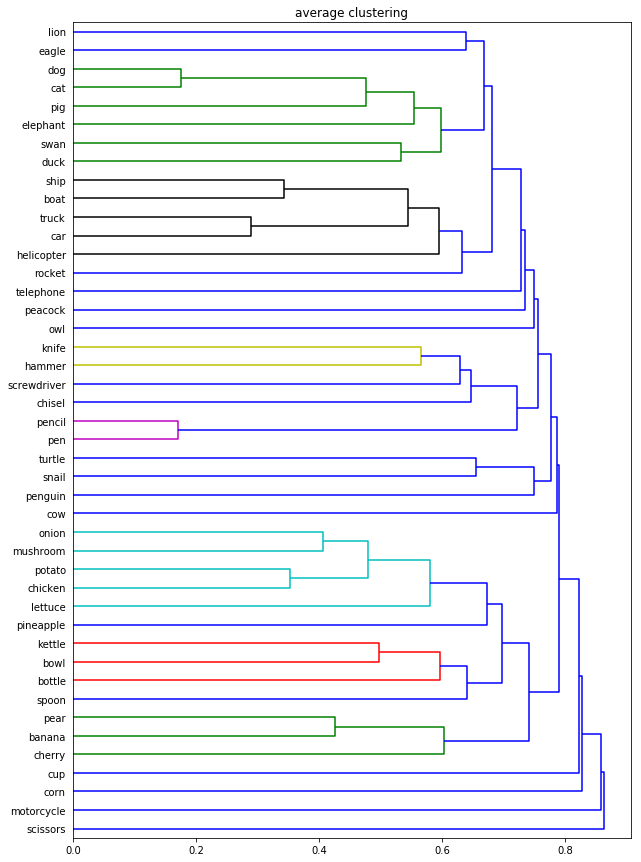

In [14]:
TreeC= linkage(matrix1_bnc,'average','cosine')
plt.figure(figsize=[10,15])
plt.title('average clustering')
dendrogram(TreeC, labels=words1, orientation= 'right',leaf_font_size=10)

## Question 2 (10%)
Here, you will the resulting dendrograms by comparing them with each other.

a) With which cluster is the word *helicopter* merged and with which cluster is this new cluster merged afterwards? List all the  words involved to answer the question. 

In the warm-up example, the cluster with which *o* is merged is $\{e,a\}$, and this new cluster $\{e,a,o\}$ is afterwards merged with k . So, the words involved are  e,a,o,k.  


single:{ship,boat},{dog,cat,pig}
complete:{ship,boat},{dog,cat,pig}
average:{ship,boat,truck,car},{rocket}

b) How is the situation with respect to
*bottle*? 

single:{kettle,bowl},{spoon}
complete:{kettle,bowl},{spoon}
average:{kettle,bowl},{spoon}

c) Which criterion do you think gives the most
reasonable clusterings?

Average.It was the only one depending on which the cluster of helicopter moved to rocket rather than some animals.
Single clustering can make errors easily because a single one may not represent the category well.
And compelete clustering stresses too much on the whole group.It will not work so well if there is already much diversity in the group.
Average clustering can avoid problems above,and it is quite consistent with the prototype theory.


## Question 3 (15%): 

Cluster the target words again, but this time on the basis of the vector representations obtained from McRae et al.'s data. Again, perform the clustering for all three criteria and
answer questions a)-c) above. 

First, show the resulting dendrograms for each criterion. 

{'color_list': ['g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b',
  'm',
  'm',
  'm',
  'y',
  'y',
  'y',
  'b',
  'b',
  'b',
  'b',
  'k',
  'k',
  'b',
  'b',
  'b',
  'g',
  'r',
  'r',
  'b',
  'b',
  'b',
  'c',
  'm',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 0.5475282414107345, 0.5475282414107345, 0.0],
  [0.0, 0.3337295558179528, 0.3337295558179528, 0.0],
  [0.0, 0.47527945535269633, 0.47527945535269633, 0.3337295558179528],
  [0.0, 0.5280208116105362, 0.5280208116105362, 0.47527945535269633],
  [0.0, 0.4904493410033779, 0.4904493410033779, 0.0],
  [0.0, 0.5582161540708821, 0.5582161540708821, 0.4904493410033779],
  [0.5280208116105362,
   0.6298414049630653,
   0.6298414049630653,
   0.5582161540708821],
  [0.0, 0.4899583984237378, 0.4899583984237378, 0.0],
  [0.0, 0.2358174920570918, 0.2358174920570918, 0.0],
  [0.0, 0.5672460713241352, 0.5672460713241352, 0.2358174920570918],
  [0.0, 0.5959476902222584, 0.59

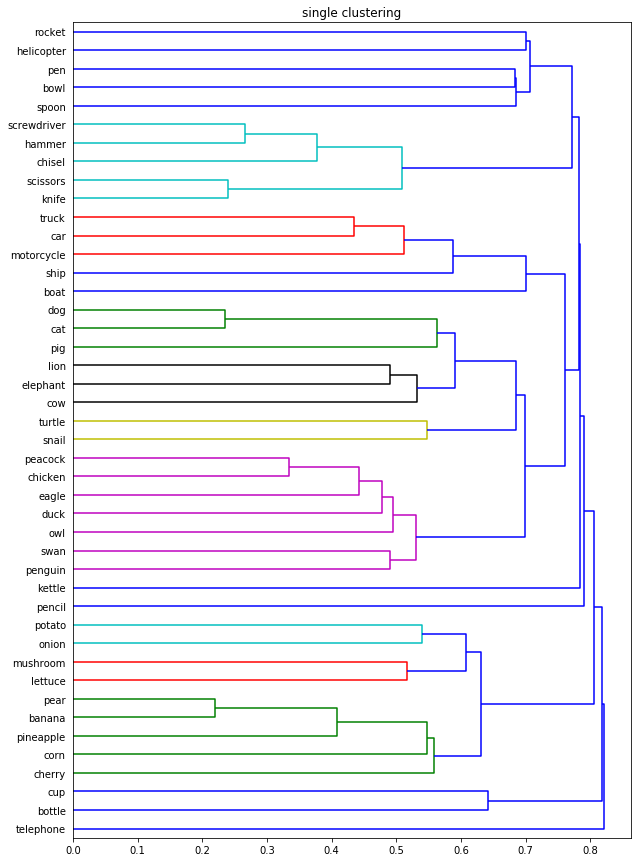

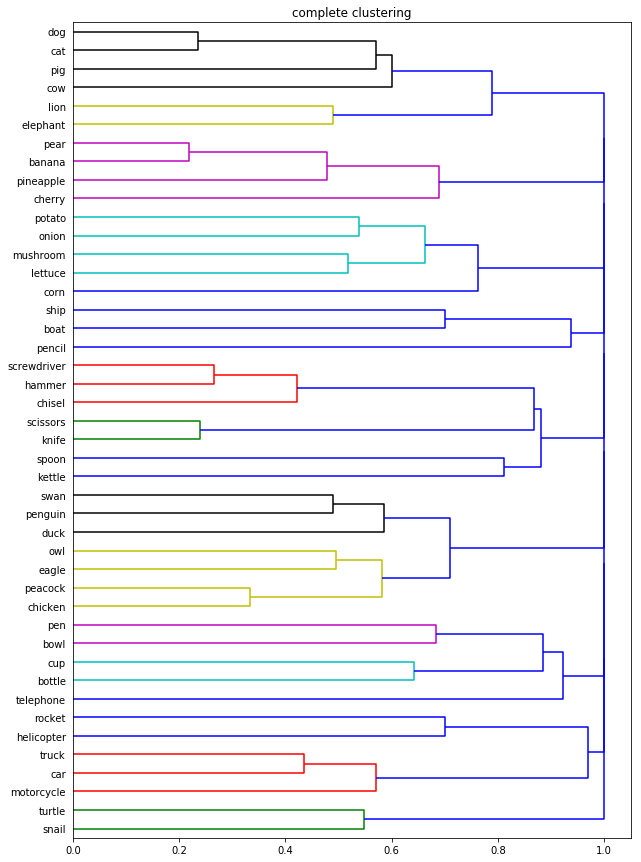

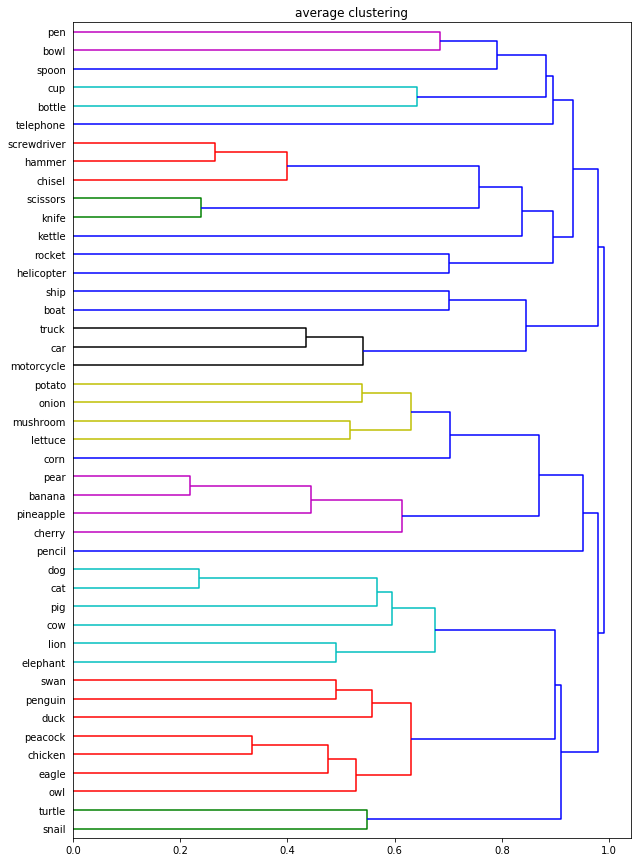

In [15]:
TreeD = linkage(matrix1_mcrae,'single','cosine')
plt.figure(figsize=[10,15])
plt.title('single clustering')
dendrogram(TreeD, labels=words1, orientation= 'right',leaf_font_size=10)

TreeE = linkage(matrix1_mcrae,'complete','cosine')
plt.figure(figsize=[10,15])
plt.title('complete clustering')
dendrogram(TreeE, labels=words1, orientation= 'right',leaf_font_size=10)

TreeF = linkage(matrix1_mcrae,'average','cosine')
plt.figure(figsize=[10,15])
plt.title('average clustering')
dendrogram(TreeF, labels=words1, orientation= 'right',leaf_font_size=10)

Answer a) to c) here below.

a)single:{rocket},{pen,bowl,spoon}
  complete:{rocket},{truck,car,motorcycle}
  average:{rocket},{screwdriver,hammer,chisel,scissors,knife,kettle}
  
b)single:{cup},{telephone}
  complete:{cup},{pen,bowl}
  average:{cup},{pen,bowl,spoon}
 
c)average.It successfully clustered all the animals,food together with right subcategories--birds,mammals and others;non-fruits and fruits.It also clustered most of the artifacts right.

How do the clusters obtained from the two vector
representations differ?  In particular, discuss which vector representations yields more intuitive and semantically coherent
clusters. 

In [16]:
#For the bnc vector,the clusters are disordered and often could not form a big group.
#For the McRae vector,the clusters merge in a sensible way and grew less and less neatly.
#They eventually formed into several big classes:utensils,viechles,food,animals.
#Also,if you have a look at  the labels of the dendrograms,you can notice that every gap between the two adjacent words is usually not very big.
#However,in bnc,words often jumped from one category to another.


## Question 4 (10%)
Now compare the two different semantic
space representations, answering the following: 

a) What can you infer from the clustering with respect to the semantic category of chicken? 


BNC:Chicken started to cluster with potato and later other food.
McRae:Chicken started to cluster with peacock and later other birds.
So a chicken is probably a kind of birds that can be eaten.

b) Which representation (based on the BNC or McRae’sfeature norms) do you think yields a better clustering for it? Justify your answer.

McRae.The BNC matrix records the numbers of words that concurrently appeared with the original one ,while McRae's is based on humans' judgement.The words'appearing together doesn't necessarily indicate that they have similar meanings.The situation will only be worse if the word is less frequent and quite independent.The words that surround them usually don't mean anything.Ihis similarity only represents that these words are more often to be combined and referred together in real life.Applications are not the same as the  semantic meaning based on human's original understanding and catgoriazation.For example,although a chicken is a very common bird,we often only regard it as a food resource rather one flying animal in daily life.

## Question 5 (8%) 
Finally, compare the clusterings you obtain for BNC and McRae vectors against the provided human-produced gold standard classifications.

The gold standard classifications were obtained by presenting the words to human participants asking them to name the category to which each noun belonged. Participant responses were freeform strings, i.e., participants were not provided with a list of possible categories. After adjusting for differences in spelling and grouping together synonyms, these responses were used to determine the most “correct” category label for each of the  nouns.

To make things easier, only look at the clusters obtained when setting the maximum number of clusters to 6 (which corresponds to the number of most fine-grained gold clusters). 

In [17]:
# let's import the human classifications
human_classification_names = pd.read_csv("./categories.txt", index_col=0)

Now, recompute BNC and McRae vector clusters using 6 as maximum number of clusters


In [18]:
clustering1 = fcluster(TreeA,t=6, criterion= 'maxclust')
for word, cluster in zip(words1, clustering1):
    print (word,':', cluster)
    
clustering2 = fcluster(TreeB,t=6, criterion= 'maxclust')
for word, cluster in zip(words1, clustering1):
    print (word,':', cluster)
    
clustering3 = fcluster(TreeC,t=6, criterion= 'maxclust')
for word, cluster in zip(words1, clustering1):
    print (word,':', cluster)
    
clustering4 = fcluster(TreeD,t=6, criterion= 'maxclust')
for word, cluster in zip(words1, clustering2):
    print (word,':', cluster)

clustering5 = fcluster(TreeE,t=6, criterion= 'maxclust')
for word, cluster in zip(words1, clustering1):
    print (word,':', cluster)
    
clustering6 = fcluster(TreeF,t=6, criterion= 'maxclust')
for word, cluster in zip(words1, clustering1):
    print (word,':', cluster)

banana : 1
boat : 1
bottle : 1
bowl : 1
car : 1
cat : 1
cherry : 1
chicken : 1
chisel : 1
corn : 6
cow : 1
cup : 1
dog : 1
duck : 1
eagle : 1
elephant : 1
hammer : 1
helicopter : 1
kettle : 1
knife : 1
lettuce : 1
lion : 1
motorcycle : 1
mushroom : 1
onion : 1
owl : 2
peacock : 4
pear : 1
pen : 1
pencil : 1
penguin : 5
pig : 1
pineapple : 1
potato : 1
rocket : 1
scissors : 1
screwdriver : 1
ship : 1
snail : 3
spoon : 1
swan : 1
telephone : 1
truck : 1
turtle : 1
banana : 1
boat : 1
bottle : 1
bowl : 1
car : 1
cat : 1
cherry : 1
chicken : 1
chisel : 1
corn : 6
cow : 1
cup : 1
dog : 1
duck : 1
eagle : 1
elephant : 1
hammer : 1
helicopter : 1
kettle : 1
knife : 1
lettuce : 1
lion : 1
motorcycle : 1
mushroom : 1
onion : 1
owl : 2
peacock : 4
pear : 1
pen : 1
pencil : 1
penguin : 5
pig : 1
pineapple : 1
potato : 1
rocket : 1
scissors : 1
screwdriver : 1
ship : 1
snail : 3
spoon : 1
swan : 1
telephone : 1
truck : 1
turtle : 1
banana : 1
boat : 1
bottle : 1
bowl : 1
car : 1
cat : 1
cherry : 1

Compare the clusterings to the gold standard by inspecting the data. To do this, you can use the function "print_clusters" below to inspect the clusters. The function takes the vector of words and a vector of cluster indeces as input and prints the clusters together.

In [19]:
def print_clusters(words_vector, cluster_indeces):
    # iterate through categories
    for category_index in range(1,7):
        # iterate through all the classifications
        for index, category in enumerate(cluster_indeces):
            # if the word belongs to the current category (1-6), print it 
            if category == category_index:
                print (words_vector[index])
        print () 

In [20]:
print("BNC single")
print_clusters(words1,clustering1)
print("BNC complete")
print_clusters(words1,clustering2)
print("BNC average")
print_clusters(words1,clustering3)
print("Mcrae single")
print_clusters(words1,clustering4)
print("Mcrae complete")
print_clusters(words1,clustering5)
print("Mcrae average")
print_clusters(words1,clustering6)
print(human_classification_names)

BNC single
banana
boat
bottle
bowl
car
cat
cherry
chicken
chisel
cow
cup
dog
duck
eagle
elephant
hammer
helicopter
kettle
knife
lettuce
lion
motorcycle
mushroom
onion
pear
pen
pencil
pig
pineapple
potato
rocket
scissors
screwdriver
ship
spoon
swan
telephone
truck
turtle

owl

snail

peacock

penguin

corn

BNC complete
boat
car
helicopter
motorcycle
rocket
ship
truck

banana
cherry
chicken
lettuce
mushroom
onion
pear
pineapple
potato

chisel
hammer
knife
pen
pencil
scissors
screwdriver

bowl
cup
kettle
spoon

bottle
corn
cow

cat
dog
duck
eagle
elephant
lion
owl
peacock
penguin
pig
snail
swan
telephone
turtle

BNC average
banana
bottle
bowl
cherry
chicken
kettle
lettuce
mushroom
onion
pear
pineapple
potato
spoon

boat
car
cat
chisel
cow
dog
duck
eagle
elephant
hammer
helicopter
knife
lion
owl
peacock
pen
pencil
penguin
pig
rocket
screwdriver
ship
snail
swan
telephone
truck
turtle

cup

corn

motorcycle

scissors

Mcrae single
bottle
cup

banana
cherry
corn
lettuce
mushroom
onion
pear
p

Can you draw any conclusions regarding which semantic space representation (BNC vs McRae) and which clustering criterion works best? Discuss below.


McRae.
McRae average made the least errors compared to the human's golden rule.And although McRae complete eventually merged everything together,it was just because the clustering was too clear and efficient.It separated all the categories with equal distances to each other.BNC's classifications were more confusing.The BNC complete worked well but there was one group of bottle,corn,cow where it merged three different things together.
Average.
The single clustering has one problem.Once there's a big group,it is more likely to grow bigger and become a monopoly because there are many words inside and it is easy to find one closer to the rest of words.That's why BNC single has one huge cluster and five small cluster .And McRae single has three single-word cluster.
Although 'compelete' works better for bnc.The McRae complete had only one cluster in the end.

# Task 2: Exemplar-based Model
In this task you will identify the semantic category of new words based on established categories of known words. You will do this by building an **exemplar-based model** that identifies the category of each new word by comparing it with known exemplars, again on the basis of their semantic space representations. Specifically, the model determines the category of a new word as follows:

- It measures the new word's pairwise similarity to all known exemplars. This is done by computing the cosine similarity (i.e., cosine of the angle) between the new word’s vector representation and the vector representation of each known exemplar.


- It then assigns the new word the category of the exemplar that yielded the highest similarity score.


In Task 1, you worked with the known exemplars. 
The data for Task 2 contains the new target words you want to find categories for. In this task you will additionally use the files **categorynames.csv** and **categoryindices.csv** which lists the semantic category of every target word in the Task1. 

The categories (obtained from [here](http://wordspace.collocations.de/doku.php/data:esslli2008:concrete_%20nouns_categorization)) are six in total (e.g., bird-animalnatural,vehicle-artifact-artifact). They are organised hierarchically: from top classes (i.e. artifact and natural) to more finegrained categories (e.g. groundAnimal or fruitTree).

**category_names** (corresponding to the **categorynames.csv** file) is a column vector with one category name per row and **category_indices** (corresponding to the **categoryindices.csv** file) is a column vector which indexes each target word in **words1** with a category number ranging from 1 to 6. The index itself corresponds to the row number in **categorynames**.

In [21]:
# We import the different files for task 2
words2 = pd.read_csv("./words2.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()
matrix2_mcrae = pd.read_csv("./matrix2_mcrae.csv", index_col=0).to_numpy()
matrix2_bnc = pd.read_csv("./matrix2_bnc.csv", index_col=0).to_numpy()

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

In [22]:
# We import the different files for task 2
words2 = pd.read_csv("./words2.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()
matrix2_mcrae = pd.read_csv("./matrix2_mcrae.csv", index_col=0).values
matrix2_bnc = pd.read_csv("./matrix2_bnc.csv", index_col=0).values


In [23]:
# we import the files relating to **categories**
category_names = pd.read_csv("./categorynames.csv", index_col=0).values.flatten()
category_indices = pd.read_csv("./categoryindices.csv", index_col=0).values.flatten()


## Question 6 (15%)
Implement the exemplar-based model as described above. Apply your implementation to predict the categories for the new words in words2, using the vector space from McRae et al.’s data. 

Let's start by implementing a cosine similarity function.


In [24]:

def cosine_sim(M1,M2):
    score =np.dot(M1,M2)/(np.linalg.norm(M1)*np.linalg.norm(M2))
    
    return score


Now let's implement the exemplar-based categorisation model. 
Some code structure has been outlined to help you get started. 

In [25]:


def exemplar_model(exemplar_matrix, target_matrix, category_indices=category_indices):    
   # create a vector predictedCatIndices in which you save the predicted category index 
    predictedCatIndices = [] 
    examplarIndices = []
    
   # STEP 1:
   # compute the cosine similarity between the new word’s vector representation (target_matrix)
    # and the vector representation of each known exemplar using the cosine_sim function
    for word in target_matrix:
        m=0 
        i=0
        j=0
        for exemplar in exemplar_matrix:
            
            t=cosine_sim(word,exemplar)
#         # STEP 2: 
#         # find exemplar that yielded the highest similarity score
            if t>m:
                 m=t
                 i=j 
            j=j+1
#         # assign the new word the category of the exemplar
        predictedCatIndices.append(category_indices[i])
#          #save the index of the exemplar  
        examplarIndices.append(i)
    return predictedCatIndices, examplarIndices


Inspect the output of your model manually by printing the word, its predicted category, and the exemplar it was associated to.

In [26]:
t=exemplar_model(matrix1_mcrae,matrix2_mcrae)
for i in range(len(words2)):
    print (words2[i],category_names[t[0][i]],words1[t[1][i]])

airplane bird-animal-natural eagle
bathtub bird-animal-natural swan
belt tool-artifact-artifact pen
blueberry fruitTree-vegetable-natural cherry
broccoli green-vegetable-natural lettuce
calf groundAnimal-animal-natural pig
hawk bird-animal-natural eagle
dagger tool-artifact-artifact knife
fork tool-artifact-artifact spoon
guitar tool-artifact-artifact pencil
house vehicle-artifact-artifact car
missile vehicle-artifact-artifact rocket
razor tool-artifact-artifact scissors
salmon groundAnimal-animal-natural turtle
tank vehicle-artifact-artifact truck
worm groundAnimal-animal-natural snail


Based on your intuitions discuss which words you think were correctly classified, and which ones
weren’t. Can you think of an explanation for the classifications and misclassifications?

In [27]:
print(category_names)

#Correctly classified: blueberry,broccoli,calf,hawk,dagger,fork,razor,tank,worm
#Misclassified:        airplane,bathtub,house,missile,salmon,belt,guitar
    
#Sometimes it is because the subject is not very representative of that type and may has the similarity with other things.
#For example,the airplane is more like a eagle because both of them can fly.
#So the classification also depends on what the features are and how you value them for a certain subject.
#Moreover,the categories given are too limited.I can't find suitable categories for house, guitar,belt,missile or salmon myself.
#Obviously salmon is not a ground animal or a bird.

['bird-animal-natural' 'fruitTree-vegetable-natural'
 'green-vegetable-natural' 'groundAnimal-animal-natural'
 'tool-artifact-artifact' 'vehicle-artifact-artifact']


## Question 7  (7%)
Use your exemplar model to predict the categories for the new words, this time with the vector space constructed from the BNC. 


In [28]:
t=exemplar_model(matrix1_bnc,matrix2_bnc)
for i in range(len(words2)):
    print (words2[i],category_names[t[0][i]],words1[t[1][i]])

airplane vehicle-artifact-artifact helicopter
bathtub tool-artifact-artifact bowl
belt vehicle-artifact-artifact car
blueberry bird-animal-natural owl
broccoli green-vegetable-natural potato
calf groundAnimal-animal-natural cow
hawk vehicle-artifact-artifact ship
dagger tool-artifact-artifact knife
fork tool-artifact-artifact spoon
guitar tool-artifact-artifact hammer
house vehicle-artifact-artifact ship
missile vehicle-artifact-artifact rocket
razor tool-artifact-artifact knife
salmon bird-animal-natural chicken
tank tool-artifact-artifact bowl
worm bird-animal-natural chicken


Which words were correctly classified, and which ones weren’t?  
Can you think of an explanation for the classifications and misclassifications?

Correctly classified:airplane,broccoli,calf,dagger,fork,razor
Misclassified:bathtub,belt,blueberry,hawk,house,missile,salmon,tank,worm,guitar
Besides the reasons above,BNC stresses more on contect however showing up together doesn't necessarily mean they have similar meaning.For example,worm is linked to chicken here possibly because a chicken eats worms.

## Question 8 (10%)
Compare the predictions of the two semantic spaces. Which semantic space is better at inferring the categories of the new words? What limitations do you see with these representations? Can you think of ways to overcome them?

McRae is better in general because it misclassfied less.

But in fact sometimes bnc worked better.For example,when predicting airplane it managed to link it with a helicopter rather than a bird.
So first of all maybe we should try to combine these two semantic spaces.

Addintionaly,make sure there are enough examplars and categories.It reduces the possibility that the new word is compeletly strange and suits nowhere.

However it is still a limitation because the representation is always based on past knowledge.We could try to add a new algorithm which can automatically create a new class when its distance between any of the known groups is large.
Similarly,we can applya new algorithm when the differences between several distances to the groups are quite small.

Sometimes troubles may occur when it is hard to decide which aspect we are comparing.For example,chicken is more like a potato if you are talking about food and more like a swan if you are talking about biology.We should ajust our vectors first.Maybe attribute different features with different weights.

And finally,categorization is not all about similarity.



# More info


For more info about scipy, hierarchical clustering and matplotlib:
- [1] https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
- [2] https://docs.scipy.org/doc/scipy-0.18.1/reference/cluster.hierarchy.html
- [3] http://matplotlib.org/

<a id='References'></a>
# References

[1] K. McRae, G.S. Cree, M.S. Seidenberg, C. McNorgan. 2005. Semantic Feature Production
Norms for a Large Set of Living and Nonliving Things. Behavior Research
Methods, 37(4):547–59.


[2] The British National Corpus, version 3 (BNC XML Edition). 2007. Distributed by
Oxford University Computing Services on behalf of the BNC Consortium. http:
//www.natcorp.ox.ac.uk/.